# Face Expression Detection By Convolution Neural Network using LeNet-5 

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [35]:
dir = 'C:\\Users\\Siddharth\\Desktop\\face expreassion project'

In [36]:
os.listdir(dir)

['.ipynb_checkpoints',
 'a.mp4',
 'b.mp4',
 'c.mp4',
 'combiand image.png',
 'combiand image1.png',
 'face detection model training.ipynb',
 'Face detection sentiment .ipynb',
 'face_Detector.h5',
 'friends.mp4',
 'haarcascade-frontalface-default.xml',
 'L1 model accuracy.png',
 'L1 model loss.png',
 'orginal model loss.png',
 'original model accuracy.png',
 'sample.h5',
 'test',
 'train']

In [37]:
os.listdir(dir+'\\train\\happy')

['13156.jpg',
 '13163.jpg',
 '13168.jpg',
 '13170.jpg',
 '13176.jpg',
 '13185.jpg',
 '13197.jpg',
 '13199.jpg',
 '13206.jpg',
 '13214.jpg',
 '13219.jpg',
 '13222.jpg',
 '13226.jpg',
 '13229.jpg',
 '13232.jpg',
 '13235.jpg',
 '13241.jpg',
 '13244.jpg',
 '13247.jpg',
 '13260.jpg',
 '13261.jpg',
 '13269.jpg',
 '13272.jpg',
 '13284.jpg',
 '13287.jpg',
 '13292.jpg',
 '13294.jpg',
 '13304.jpg',
 '13313.jpg',
 '13316.jpg',
 '13328.jpg',
 '13330.jpg',
 '13338.jpg',
 '13342.jpg',
 '13343.jpg',
 '13346.jpg',
 '13361.jpg',
 '13365.jpg',
 '13374.jpg',
 '13375.jpg',
 '13377.jpg',
 '13383.jpg',
 '13387.jpg',
 '13388.jpg',
 '13396.jpg',
 '13407.jpg',
 '13410.jpg',
 '13412.jpg',
 '13413.jpg',
 '13414.jpg',
 '13417.jpg',
 '13419.jpg',
 '13422.jpg',
 '13423.jpg',
 '13435.jpg',
 '13443.jpg',
 '13454.jpg',
 '13459.jpg',
 '13461.jpg',
 '13468.jpg',
 '13469.jpg',
 '13473.jpg',
 '13475.jpg',
 '13480.jpg',
 '13485.jpg',
 '13492.jpg',
 '13496.jpg',
 '13504.jpg',
 '13509.jpg',
 '13512.jpg',
 '13515.jpg',
 '1351

In [38]:
train = dir+'\\train'

In [39]:
test = dir+'\\test'

In [40]:
plt.imread(train+'\\happy\\13414.jpg').shape

(48, 48)

# Happy class image

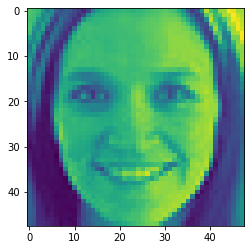

In [41]:
plt.imshow(plt.imread(train+'\\happy\\13419.jpg'))

# Sad class image

In [42]:
os.listdir(dir+'\\train\\sad')

['15196.jpg',
 '15201.jpg',
 '15203.jpg',
 '15219.jpg',
 '15224.jpg',
 '15228.jpg',
 '15235.jpg',
 '15236.jpg',
 '15243.jpg',
 '15249.jpg',
 '15254.jpg',
 '15274.jpg',
 '15275.jpg',
 '15288.jpg',
 '15307.jpg',
 '15311.jpg',
 '15312.jpg',
 '15320.jpg',
 '15326.jpg',
 '15340.jpg',
 '15346.jpg',
 '15349.jpg',
 '15355.jpg',
 '15371.jpg',
 '15407.jpg',
 '15411.jpg',
 '15415.jpg',
 '15428.jpg',
 '15429.jpg',
 '15439.jpg',
 '15453.jpg',
 '15458.jpg',
 '15479.jpg',
 '15488.jpg',
 '15499.jpg',
 '15509.jpg',
 '15513.jpg',
 '15522.jpg',
 '15528.jpg',
 '15551.jpg',
 '15554.jpg',
 '15577.jpg',
 '15587.jpg',
 '15597.jpg',
 '15601.jpg',
 '15603.jpg',
 '15606.jpg',
 '15619.jpg',
 '15630.jpg',
 '15640.jpg',
 '15643.jpg',
 '15649.jpg',
 '15655.jpg',
 '15658.jpg',
 '15661.jpg',
 '15669.jpg',
 '15676.jpg',
 '15687.jpg',
 '15727.jpg',
 '15731.jpg',
 '15732.jpg',
 '15734.jpg',
 '15737.jpg',
 '15753.jpg',
 '15757.jpg',
 '15760.jpg',
 '15784.jpg',
 '15798.jpg',
 '15804.jpg',
 '15806.jpg',
 '15814.jpg',
 '1581

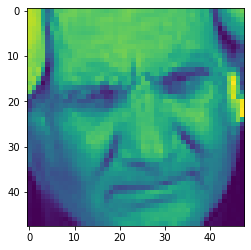

In [43]:
plt.imshow(plt.imread( train+'\\sad\\16043.jpg'))

# !

some pictures are not good for model precise classfication 

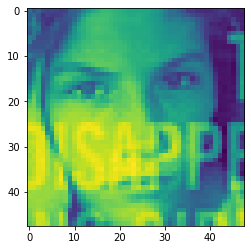

In [44]:
plt.imshow(plt.imread( train+'\\sad\\15731.jpg'))

### Checking all dimention of pictures

In [45]:
dim = []
for i in os.listdir(train+'\\happy\\'):
    shape = plt.imread(train+'\\happy\\'+i).shape
    dim.append(shape)

In [46]:
dim

[(48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),
 (48, 48),

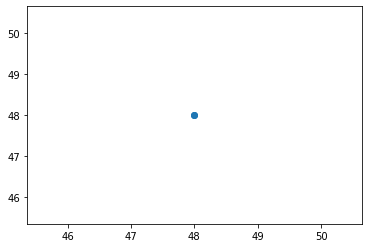

In [47]:
plt.scatter(dim[0],dim[1])

here we can see that we have same dimention for all images if we had different dimention's images we would have seen different points in scatter.

these are the too small images 

# Batch for Data preprocesing

In [48]:
plt.imread(train+'\\happy\\13718.jpg')/255 # vectores scaling

array([[0.24313725, 0.14901961, 0.12156863, ..., 0.03137255, 0.03529412,
        0.03137255],
       [0.21960784, 0.15294118, 0.11764706, ..., 0.02352941, 0.03137255,
        0.01960784],
       [0.18823529, 0.1254902 , 0.10588235, ..., 0.01568627, 0.03137255,
        0.00784314],
       ...,
       [0.02352941, 0.04705882, 0.10588235, ..., 0.03921569, 0.04313725,
        0.01960784],
       [0.05882353, 0.04313725, 0.09019608, ..., 0.03529412, 0.05490196,
        0.01568627],
       [0.07843137, 0.0627451 , 0.01960784, ..., 0.00784314, 0.03921569,
        0.01960784]])

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
img = ImageDataGenerator(rescale=1/255)

In [51]:
batch = 80

train_img_gen = img.flow_from_directory(train,target_size=(48,48),batch_size=batch,class_mode='binary', 
                                        color_mode='grayscale',)
test_img_gen = img.flow_from_directory(test,target_size=(48,48),batch_size=batch,class_mode='binary', 
                                        color_mode='grayscale',)

Found 7914 images belonging to 2 classes.
Found 3180 images belonging to 2 classes.


# Class labels

In [52]:
train_img_gen.class_indices

{'happy': 0, 'sad': 1}

# Model Training

In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
# example of l2 on an lstm layer
from keras.layers import LSTM
from keras.regularizers import l2,l1_l2

# CNN model without any Regularization

In [53]:
shape = (48,48,1)

In [54]:
model = Sequential()

model.add(Conv2D(filters=32 ,kernel_size=(4,4),input_shape=shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48,kernel_size=(4,4),input_shape=shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(500,activation='relu'))


model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 45, 45, 32)        544       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 19, 19, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 48)          24624     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 48)        

In [24]:
stop = EarlyStopping(monitor='val_loss',patience=5)

In [25]:
h = model.fit_generator(train_img_gen,epochs=20,validation_data=test_img_gen,callbacks=[stop])

Epoch 1/20


C:\Users\Siddharth\AppData\Local\Temp\ipykernel_19708\213564166.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(train_img_gen,epochs=20,validation_data=test_img_gen,callbacks=[stop])


99/99 [==============================] - 17s 171ms/step - loss: 0.6670 - accuracy: 0.5945 - val_loss: 0.5958 - val_accuracy: 0.6836
Epoch 2/20
99/99 [==============================] - 4s 40ms/step - loss: 0.5550 - accuracy: 0.7168 - val_loss: 0.5247 - val_accuracy: 0.7418
Epoch 3/20
99/99 [==============================] - 4s 41ms/step - loss: 0.4856 - accuracy: 0.7603 - val_loss: 0.4334 - val_accuracy: 0.7915
Epoch 4/20
99/99 [==============================] - 4s 41ms/step - loss: 0.4459 - accuracy: 0.7834 - val_loss: 0.4188 - val_accuracy: 0.7962
Epoch 5/20
99/99 [==============================] - 4s 39ms/step - loss: 0.4066 - accuracy: 0.8105 - val_loss: 0.4431 - val_accuracy: 0.7858
Epoch 6/20
99/99 [==============================] - 4s 41ms/step - loss: 0.3729 - accuracy: 0.8234 - val_loss: 0.4021 - val_accuracy: 0.8113
Epoch 7/20
99/99 [==============================] - 4s 41ms/step - loss: 0.3501 - accuracy: 0.8366 - val_loss: 0.3862 - val_accuracy: 0.8148
Epoch 8/20
99/99 [====

In [26]:
losses_1 = pd.DataFrame(model.history.history)

<AxesSubplot:>

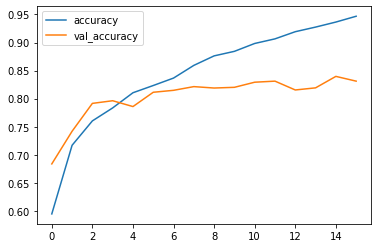

In [27]:
losses_1[['accuracy','val_accuracy']].plot()

# Overfitted Model

Above is totally overfitted model with the data which can be seen ny the above graph where we can classify good on training and worst on unseen(Testing data) which indicating the overfitting state of model

<AxesSubplot:>

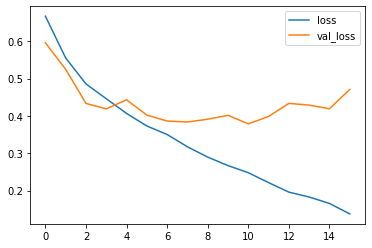

In [28]:
losses_1[['loss','val_loss']].plot()

# Model Evaluation

In [29]:
from sklearn.metrics import classification_report

In [30]:
pred_probabilities = model.predict_generator(test_img_gen)
predictions = pred_probabilities > 0.5

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_19708\3685322495.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_probabilities = model.predict_generator(test_img_gen)


In [31]:
print(classification_report(test_img_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      2100
           1       0.34      0.35      0.34      1080

    accuracy                           0.55      3180
   macro avg       0.50      0.50      0.50      3180
weighted avg       0.55      0.55      0.55      3180



We have the 55% accuracy

# Applying L1 regularation to deplete Overfitting

#### Model with regularization

In [56]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [57]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48,kernel_size=(4,4),input_shape=shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48,kernel_size=(4,4),input_shape=shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(500,activation='relu',kernel_regularizer=  tf.keras.regularizers.L1(0.01)))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 45, 45, 32)        544       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 19, 19, 48)        24624     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 9, 9, 48)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 48)          36912     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 48)        

In [109]:
stop = EarlyStopping(monitor='val_loss',patience=5)

In [110]:
h = model.fit_generator(train_img_gen,epochs=20,validation_data=test_img_gen,callbacks=[stop])

Epoch 1/20


C:\Users\Siddharth\AppData\Local\Temp\ipykernel_4836\213564166.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(train_img_gen,epochs=20,validation_data=test_img_gen,callbacks=[stop])


99/99 [==============================] - 7s 67ms/step - loss: 25.4377 - accuracy: 0.5742 - val_loss: 1.2306 - val_accuracy: 0.6544
Epoch 2/20
99/99 [==============================] - 6s 65ms/step - loss: 1.0037 - accuracy: 0.5708 - val_loss: 0.9369 - val_accuracy: 0.6601
Epoch 3/20
99/99 [==============================] - 7s 66ms/step - loss: 0.9695 - accuracy: 0.5998 - val_loss: 0.9239 - val_accuracy: 0.6610
Epoch 4/20
99/99 [==============================] - 6s 64ms/step - loss: 0.9505 - accuracy: 0.6141 - val_loss: 0.9119 - val_accuracy: 0.6560
Epoch 5/20
99/99 [==============================] - 6s 64ms/step - loss: 0.9244 - accuracy: 0.6281 - val_loss: 0.8913 - val_accuracy: 0.6469
Epoch 6/20
99/99 [==============================] - 6s 64ms/step - loss: 0.9130 - accuracy: 0.6380 - val_loss: 0.8757 - val_accuracy: 0.6855
Epoch 7/20
99/99 [==============================] - 6s 64ms/step - loss: 0.8960 - accuracy: 0.6548 - val_loss: 0.8597 - val_accuracy: 0.7000
Epoch 8/20
99/99 [=====

In [111]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

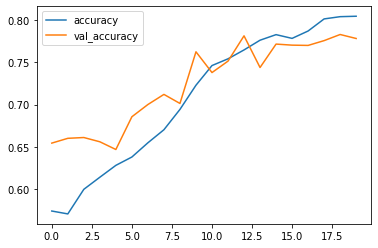

In [112]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

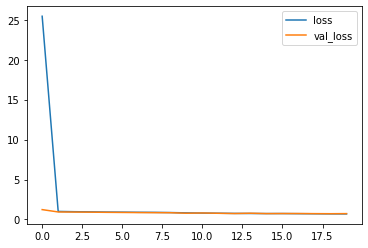

In [113]:
losses[['loss','val_loss']].plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'losses' is not defined

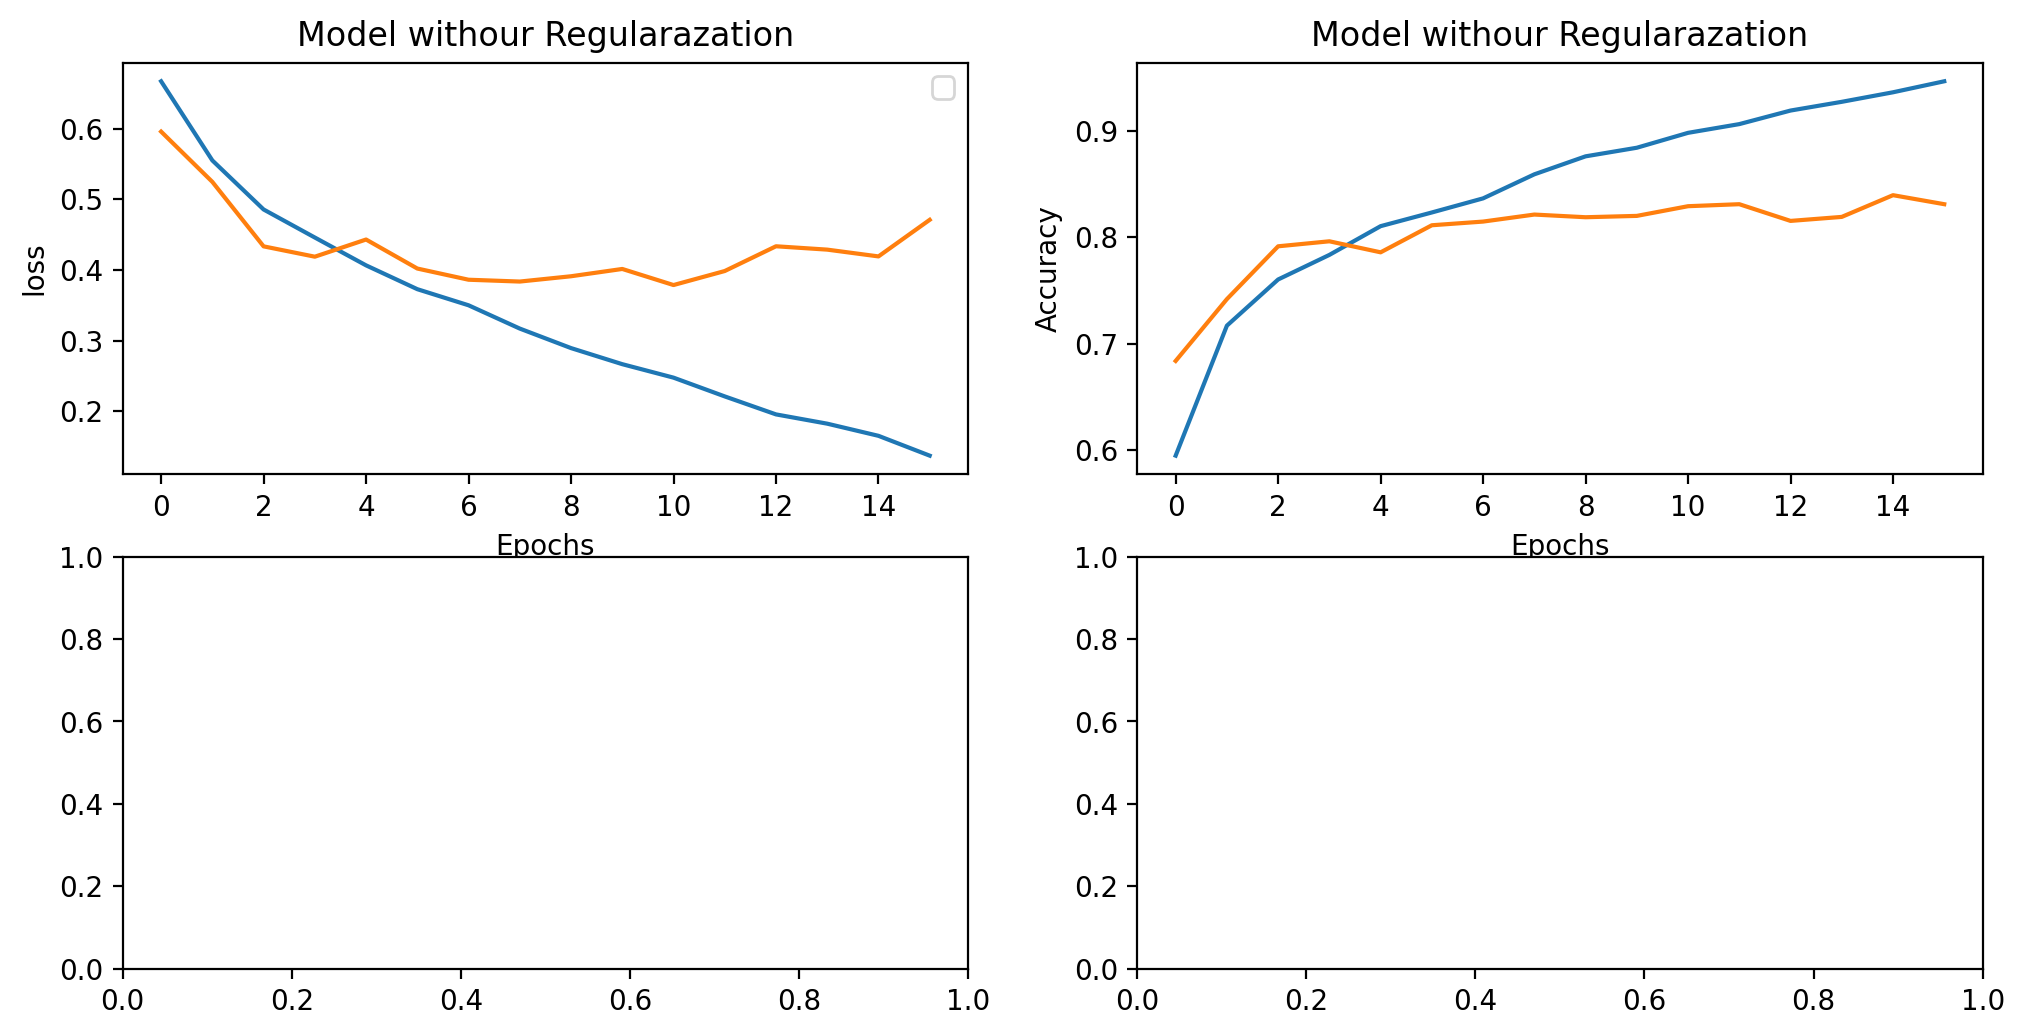

In [33]:
fig , axes = plt.subplots(2,2,figsize=(12,6),dpi=200)

axes[0][0].plot(losses_1[['loss','val_loss']])
axes[0][0].set_xlabel('Epochs')
axes[0][0].set_ylabel('loss')
axes[0][0].set_title('Model withour Regularazation')
axes[0][0].legend()

axes[0][1].plot(losses_1[['accuracy','val_accuracy']])
axes[0][1].set_xlabel('Epochs')
axes[0][1].set_ylabel('Accuracy')
axes[0][1].set_title('Model withour Regularazation')

axes[1][0].plot(losses[['loss','val_loss']])
axes[1][0].set_xlabel('Epochs')
axes[1][0].set_ylabel('loss')
axes[1][0].set_title('L1 Regularazation')
axes[1][0].legend()


axes[1][1].plot(losses[['accuracy','val_accuracy']])
axes[1][1].set_xlabel('Epochs')
axes[1][1].set_ylabel('Accuracy')
axes[1][1].set_title('L2 Regularazation')
axes[1][1].legend()

plt.tight_layout()

We can see how massively we improved model loss and accuracy

# Model Evaluation

In [60]:
pred_probabilities = model.predict_generator(test_img_gen)
predictions = pred_probabilities > 0.5

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_4836\3685322495.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_probabilities = model.predict_generator(test_img_gen)


In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(test_img_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      2100
           1       0.35      0.33      0.34      1080

    accuracy                           0.57      3180
   macro avg       0.51      0.51      0.51      3180
weighted avg       0.56      0.57      0.56      3180



# Model Deployment

In [ ]:
model.save('sample.h5') # the Regularzation applied Model these sells are run after respective model trainings

In [32]:
model.save('face_Detector.h5') # the first model which was worst  

# Thank you

# Email

siddharthchikalkar5982@gmail.com

# Linkdin

https://www.linkedin.com/in/siddharth-chikalkar-7244141b0